In [1]:
!pip install tensorflow

In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

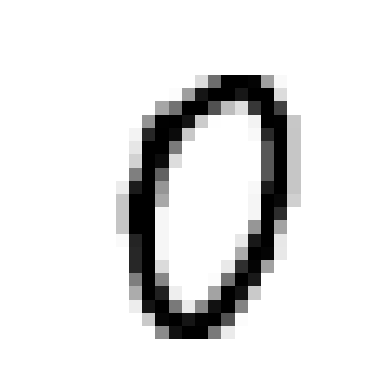

In [29]:
plt.imshow(X_train_full[1000], cmap='binary')
plt.axis('off')
plt.show()

<Axes: >

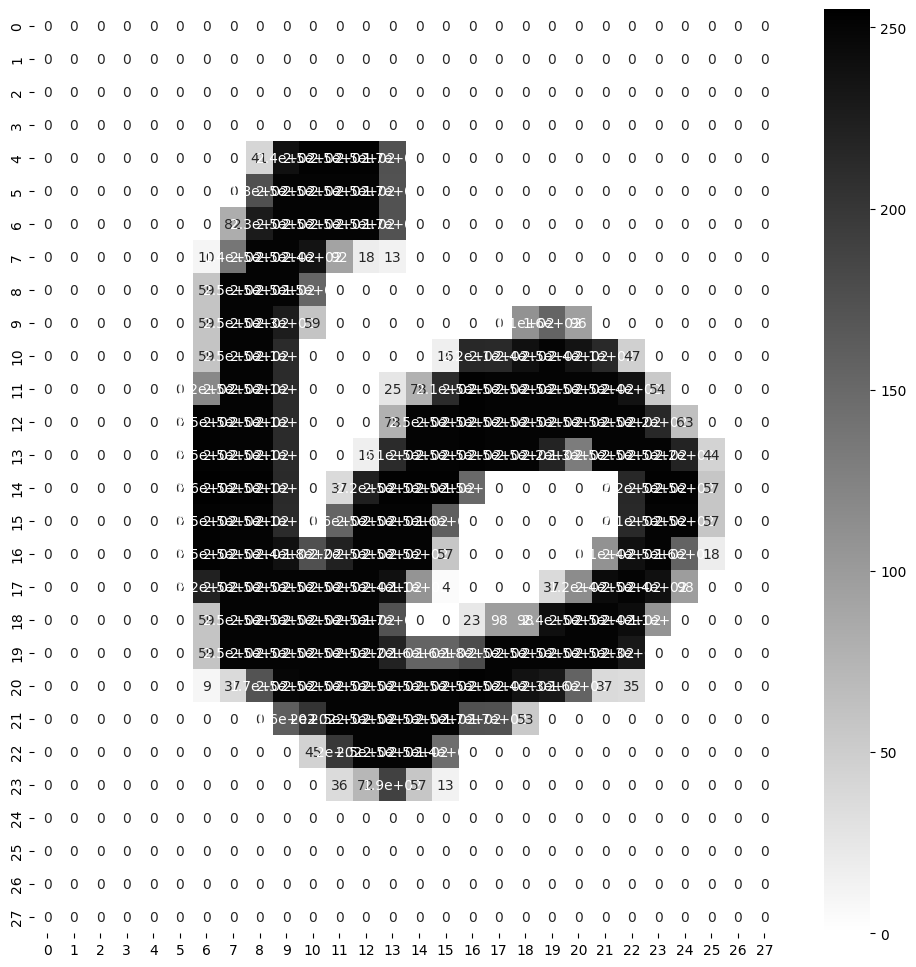

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[9000], annot=True, cmap='binary')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] / 255., y_train_full[5000:] / 255.

In [13]:
X_test = X_test / 255.

In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)


(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

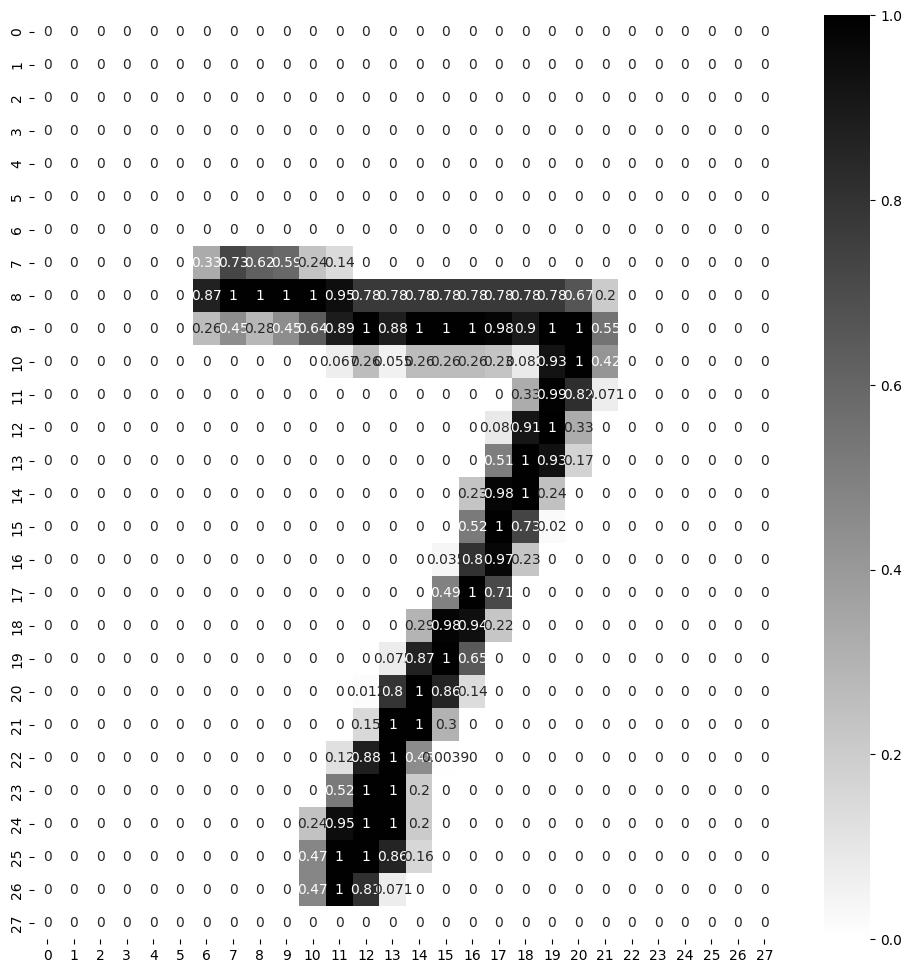

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(X_test[0], annot=True, cmap='binary')

In [16]:
layer = [tf.keras.layers.Flatten(input_shape=[28,28], name='InputLayer'),
         tf.keras.layers.Dense(300, activation='relu',name='HiddenLayer1'),
         tf.keras.layers.Dense(100, activation='relu',name='HiddenLayer2'),
         tf.keras.layers.Dense(10, activation='softmax',name='OutputLayer')]

In [17]:
model_clf = tf.keras.models.Sequential(layer)

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
LOSS_FUNC = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
model_clf.compile(loss=LOSS_FUNC,optimizer=OPTIMIZER,metrics=METRICS)

In [21]:
hidden1 = model_clf.layers[1]
weights, baises = hidden1.get_weights()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
EPOCH = 5
Validation_Set = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCH, validation_data=Validation_Set)

Epoch 1/5
1719/1719 [==============================] - 11s 3ms/step - loss: 0.0033 - accuracy: 0.0989 - val_loss: 6.3918e-08 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 3.4620e-08 - accuracy: 0.0990 - val_loss: 8.5592e-09 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 7.5188e-09 - accuracy: 0.0990 - val_loss: 2.5749e-09 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 2.7808e-09 - accuracy: 0.0990 - val_loss: 1.0729e-09 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1964e-09 - accuracy: 0.0990 - val_loss: 5.0068e-10 - val_accuracy: 0.0958


In [24]:
import time

In [26]:
def save_model_path(model_dir = "/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S.keras")
  model_path = os.path.join(model_dir, fileName)
  return model_path

model_clf.save(save_model_path())

In [27]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.346015e-03,0.098927,6.391789e-08,0.0958
1,3.461966e-08,0.098982,8.559181e-09,0.0958
2,7.518768e-09,0.098982,2.574916e-09,0.0958
3,2.780811e-09,0.098982,1.072883e-09,0.0958
4,1.196424e-09,0.098982,5.006788e-10,0.0958


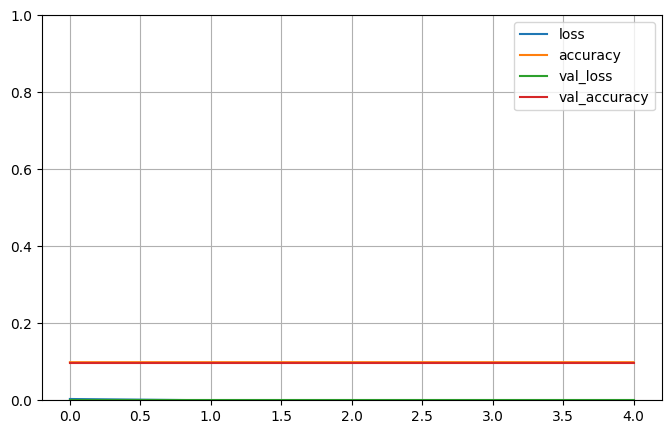

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 44.4632 - accuracy: 0.0980


[44.463226318359375, 0.09799999743700027]

In [34]:
predictions = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 83ms/step


In [39]:
predictions[0].round(5)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)